# Naive Bayes Klassifikator
Als einführendes Beispiel wollen wir mit Hilfe des Naive-Bayes Klassifikators Obsorten, Äpfel und Birnen, andhand des Gewichts und Zuckergehalts klassifizieren.

Wir laden die Daten in ein Dataframe: Zuckergehalt und Gewicht von Äpfeln und Birnen:

In [1]:
import pandas as pd
import numpy as np

url="https://raw.githubusercontent.com/troescherw/datasets/master/obst.csv"
df = pd.read_csv(url, delimiter=";")
df

,Zuckergehalt,Gewicht,Obstsorte
0,12.0,112,Apfel
1,10.0,100,Apfel
2,9.0,120,Apfel
3,12.0,119,Apfel
4,11.0,115,Apfel
5,13.0,113,Apfel
6,12.0,114,Apfel
7,15.0,150,Birne
8,16.0,149,Birne
9,14.0,147,Birne


Wir können nun unser Modell erstellen.

In [2]:
from sklearn.naive_bayes import GaussianNB

X = df[["Zuckergehalt", "Gewicht"]]
y = df.Obstsorte
model = GaussianNB().fit(X,y)

Mit Hilfe des Modells können wir nun zwei "unbekannte" Obststücke klassifiziert werden. Haben wir ein Stück Obst, das z.B. ein Zuckergehalt von 52,5g und ein Gewicht von 125g verfügt, fragen wir das Modell, ob es sich um einen Apfel oder eine Birne handelt:

In [3]:
unbekanntesObst = pd.DataFrame({"Zuckergehalt": [11.5, 15.1], "Gewicht":[110, 135]})

print(unbekanntesObst)
model.predict(unbekanntesObst)


   Zuckergehalt  Gewicht
0          11.5      110
1          15.1      135


array(['Apfel', 'Birne'], dtype='<U5')

Das Modell gibt eine **0** zurück, damit handelt es sich um einen Apfel. Wir erstellen ein Scatterplot und fügen dort auch das unbekannte Stück Obst ein:

[]

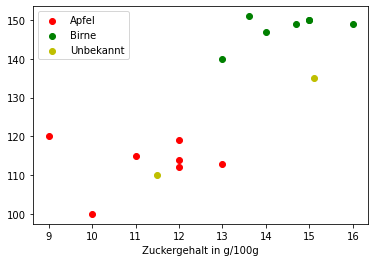

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df[df.Obstsorte=="Apfel"].Zuckergehalt, df[df.Obstsorte=="Apfel"].Gewicht, c="r", label="Apfel")
plt.scatter(df[df.Obstsorte=="Birne"].Zuckergehalt, df[df.Obstsorte=="Birne"].Gewicht, c="g", label="Birne")
plt.scatter(unbekanntesObst.Zuckergehalt, unbekanntesObst.Gewicht, c="y", label="Unbekannt")
plt.xlabel("Zuckergehalt in g/100g")
plt.legend()
plt.plot()

## Beispiel: Naive-Bayes-Modell für die Vorhersage von Brustkrebs
Wir erstellen anhand des bereits verwendeten Datensatzes *breast_cancer* eine Prognose, ob eine Patientin anhand der vorliegenden Daten an Brustkrebs erkrankt ist (gutartiges oder bösartiges Melanom). Um die Modellqualität zu prüfen führen wir eine k-Fold-Cross-Validation durch (mit k=10). Das heißt, wir erstellen jeweils Testdatensätze (mit 10% der Daten), um die Modellqalität zu prüfen. Es handelt sich  jeweils um unterschiedliche Testdatensätze.

Wir laden dazu den Datensatz, der von sklearn stammt, und geben die Beschreibung aus:



In [5]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Wir laden die Daten in X und y
X = bc.data
y = bc.target

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

model = GaussianNB()

from sklearn.model_selection import train_test_split

scores = [] # Leere Liste für Scores

for index_train, index_test in kf.split(X):
    X_train = X[index_train]
    X_test = X[index_test]
    y_train = y[index_train]
    y_test = y[index_test]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores


[0.9298245614035088,
 0.9122807017543859,
 0.9649122807017544,
 0.8947368421052632,
 0.9649122807017544,
 0.9298245614035088,
 0.9122807017543859,
 0.9473684210526315,
 0.9824561403508771,
 0.9464285714285714]

In [8]:
print(f"Mittelwert Accuracy:  {np.mean(scores)}")
print(f"Standardabweichung der Accuracy: {np.std(scores)}")

Mittelwert Accuracy:  0.9385025062656641
Standardabweichung der Accuracy: 0.026285954713346736


## Beispiel: Ziffernerkennung
Im Package *sklearn.datasets* befindet sich ein Datensatz *digits*, der Graustufenbilder von handschriftlich erstellten Ziffern 0..9 enthält. Wir versuchen nun mit Hilfe eines Naiven Bayes Klassifikators diese Graustufenbilder den richtigen Klassen (0..9) zuzuordnen.

Wir laden den Datensatz und geben die Beschreibung aus.


In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Wir geben exemplarisch die ersten 5 Bitmap-Bilder aus:

<Figure size 432x288 with 0 Axes>

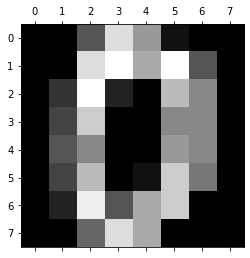

<Figure size 432x288 with 0 Axes>

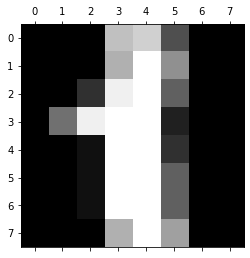

<Figure size 432x288 with 0 Axes>

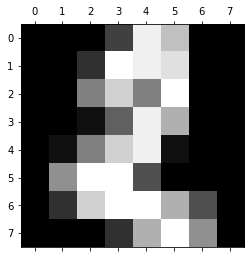

<Figure size 432x288 with 0 Axes>

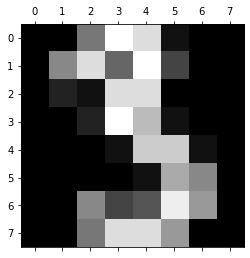

<Figure size 432x288 with 0 Axes>

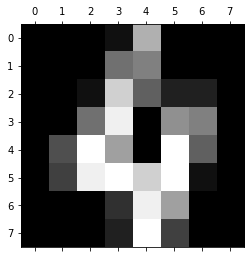

In [10]:
import matplotlib.pyplot as plt 
for i in range(5):
    plt.gray()
    plt.matshow(digits.images[i]) 
    plt.show() 

Es werden wie üblich die Train- Testdatasets erstellt und das Modell und eine Prediction erstellt. Wir geben die Accuracy und die Confusion Matrix aus.

0.8518518518518519


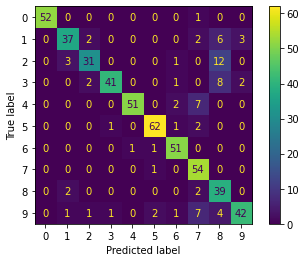

In [11]:
from sklearn.metrics import plot_confusion_matrix
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

model = GaussianNB().fit(X_train, y_train)
pred = model.predict(X_test)

print(model.score(X_test, y_test))
plot_confusion_matrix(model, X_test, y_test)
